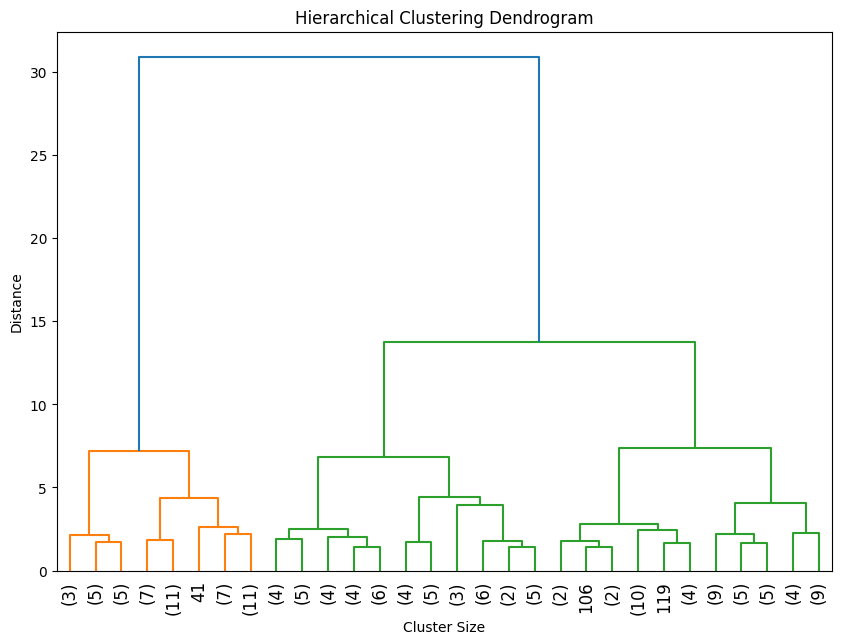

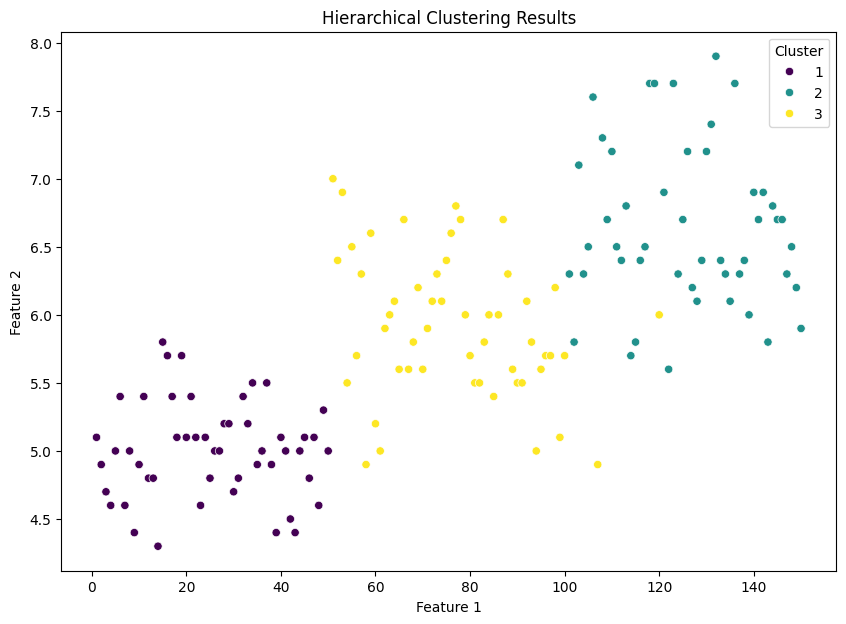

       Species  hierarchical_cluster
0  Iris-setosa                     1
1  Iris-setosa                     1
2  Iris-setosa                     1
3  Iris-setosa                     1
4  Iris-setosa                     1


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Iris.csv')

X = df.drop(columns=['Species'])  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Z = linkage(X_scaled, method='ward')

max_d = 3 
df['hierarchical_cluster'] = fcluster(Z, max_d, criterion='maxclust')


plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


plt.figure(figsize=(10, 7))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['hierarchical_cluster'], palette='viridis')
plt.title('Hierarchical Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

print(df[['Species', 'hierarchical_cluster']].head())
